In [4]:
# split into train and test set
!git clone 
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset
 

# class that defines and loads the Strwberry dataset
class StrawberryDataset(Dataset):
	# load the dataset definitions
	def load_dataset(self, dataset_dir, is_train=True):
		# define one class
		self.add_class("dataset", 1, "Strawberry")
		# define data locations
		images_dir = dataset_dir + '/images/'
		annotations_dir = dataset_dir + '/annots/'
		# find all images
		for filename in listdir(images_dir):
			# extract image id
			image_id = filename[:-4]
			# skip bad images
			#if image_id in ['00015']:
			#	continue
			# skip all images after 150 if we are building the train set
			if is_train and int(image_id) >= 15:
				continue
			# skip all images before 150 if we are building the test/val set
			if not is_train and int(image_id) < 15:
				continue
			img_path = images_dir + filename
			ann_path = annotations_dir + image_id + '.xml'
			# add to dataset
			self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
 
	# extract bounding boxes from an annotation file
	def extract_boxes(self, filename):
		# load and parse the file
		tree = ElementTree.parse(filename)
		# get the root of the document
		root = tree.getroot()
		# extract each bounding box
		boxes = list()
		for box in root.findall('.//bndbox'):
			xmin = int(box.find('xmin').text)
			ymin = int(box.find('ymin').text)
			xmax = int(box.find('xmax').text)
			ymax = int(box.find('ymax').text)
			coors = [xmin, ymin, xmax, ymax]
			boxes.append(coors)
		# extract image dimensions
		width = int(root.find('.//size/width').text)
		height = int(root.find('.//size/height').text)
		return boxes, width, height
 
	# load the masks for an image
	def load_mask(self, image_id):
		# get details of image
		info = self.image_info[image_id]
		# define box file location
		path = info['annotation']
		# load XML
		boxes, w, h = self.extract_boxes(path)
		# create one array for all masks, each on a different channel
		masks = zeros([h, w, len(boxes)], dtype='uint8')
		# create masks
		class_ids = list()
		for i in range(len(boxes)):
			box = boxes[i]
			row_s, row_e = box[1], box[3]
			col_s, col_e = box[0], box[2]
			masks[row_s:row_e, col_s:col_e, i] = 1
			class_ids.append(self.class_names.index('Strawberry'))
		return masks, asarray(class_ids, dtype='int32')
 
	# load an image reference
	def image_reference(self, image_id):
		info = self.image_info[image_id]
		return info['path']
 
# train set
train_set = StrawberryDataset()
train_set.load_dataset('D:\peter01\Strawberry', is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))
 
# test/val set
test_set = StrawberryDataset()
test_set.load_dataset('D:\peter01\Strawberry', is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))


Train: 14
Test: 1


(480, 640, 3)
(480, 640, 20)


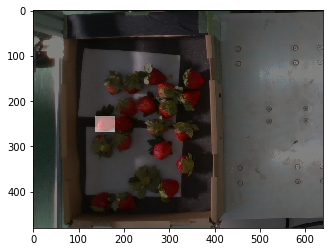

In [2]:
# plot one photograph and mask
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset
from matplotlib import pyplot
 
# load an image
image_id = 0
image = train_set.load_image(image_id)
print(image.shape)
# load image mask
mask, class_ids = train_set.load_mask(image_id)
print(mask.shape)

# plot image
pyplot.imshow(image)
# plot mask
pyplot.imshow(mask[:, :, 0], cmap='gray', alpha=0.5)
pyplot.show()

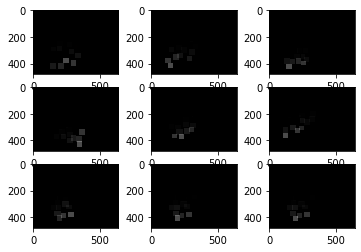

{'id': '00001', 'source': 'dataset', 'path': 'D:\\peter01\\Strawberry/images/00001.jpg', 'annotation': 'D:\\peter01\\Strawberry/annots/00001.xml'}
{'id': '00002', 'source': 'dataset', 'path': 'D:\\peter01\\Strawberry/images/00002.jpg', 'annotation': 'D:\\peter01\\Strawberry/annots/00002.xml'}
{'id': '00003', 'source': 'dataset', 'path': 'D:\\peter01\\Strawberry/images/00003.jpg', 'annotation': 'D:\\peter01\\Strawberry/annots/00003.xml'}
{'id': '00004', 'source': 'dataset', 'path': 'D:\\peter01\\Strawberry/images/00004.jpg', 'annotation': 'D:\\peter01\\Strawberry/annots/00004.xml'}
{'id': '00005', 'source': 'dataset', 'path': 'D:\\peter01\\Strawberry/images/00005.jpg', 'annotation': 'D:\\peter01\\Strawberry/annots/00005.xml'}
{'id': '00006', 'source': 'dataset', 'path': 'D:\\peter01\\Strawberry/images/00006.jpg', 'annotation': 'D:\\peter01\\Strawberry/annots/00006.xml'}
{'id': '00007', 'source': 'dataset', 'path': 'D:\\peter01\\Strawberry/images/00007.jpg', 'annotation': 'D:\\peter01\\S

In [3]:
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	image = train_set.load_image(i)
	pyplot.imshow(image)
	# plot all masks
	mask, _ = train_set.load_mask(i)
	for j in range(mask.shape[2]):
		pyplot.imshow(mask[:, :, j], cmap='gray', alpha=0.3)
# show the figure
pyplot.show()

# enumerate all images in the dataset
for image_id in train_set.image_ids:
	# load image info
	info = train_set.image_info[image_id]
	# display on the console
	print(info)